# Segment Anything Video (SA-V) Dataset

This notebook presents an example showing how to load and visualize the SA-V annotations.
To run this notebook, you will need to have the following installed:
- jupyter
- matplotlib
- opencv-python
- numpy
- pycocoevalcap
- pandas

## Import libaries

In [3]:
import json

import pandas as pd
import videoseal

from videoseal.data.sav_dataset.sav_utils import SAVDataset

In [15]:
%ls /large_experiments/meres/hadyelsahar/watermarking_datasets/sa-v/sav_train/*/*mp4

/bin/bash: line 1: /usr/bin/ls: Argument list too long


## Example video and annotations from SA-V

In [5]:
sav_dataset = SAVDataset(sav_dir="/large_experiments/meres/hadyelsahar/watermarking_datasets/sa-v/sav_train/sav_001/")
frames, manual_annot, auto_annot = sav_dataset.get_frames_and_annotations("sav_001233")

There are 355 frames decoded from /large_experiments/meres/hadyelsahar/watermarking_datasets/sa-v/sav_train/sav_001/sav_001233.mp4 (24fps).
Videos are annotated every 4 frames. To align with the annotations, downsample the video to 89 frames.


### Show the SA-V annotations in frame 0 - auto + manual

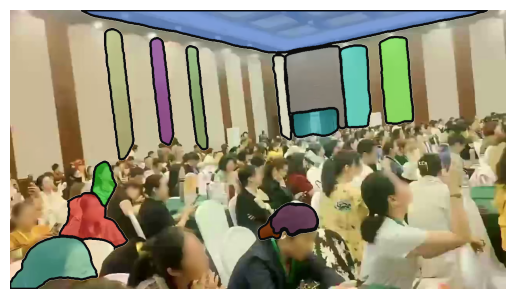

In [6]:
sav_dataset.visualize_annotation(
    frames, manual_annot, auto_annot, 
    annotated_frame_id=0,
)

### Show the SA-V annotations in another frame - auto + manual

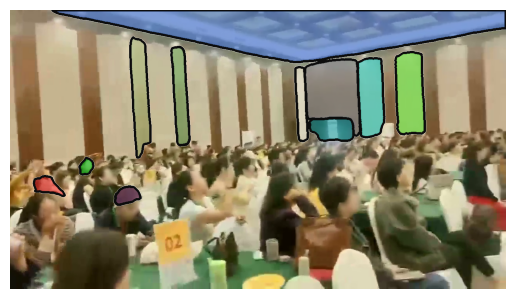

In [7]:
sav_dataset.visualize_annotation(
    frames, manual_annot, auto_annot, 
    annotated_frame_id=30,
)

### Show the SA-V annotations in frame 0 - manual only

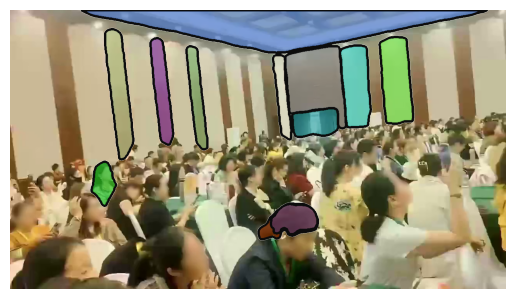

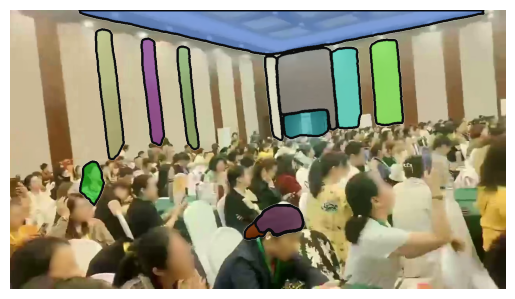

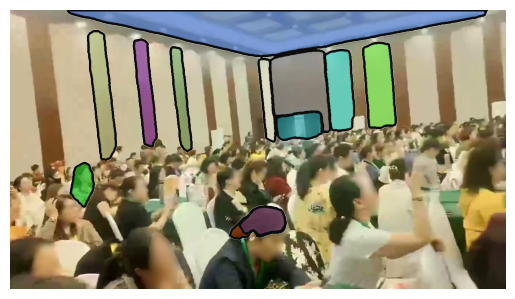

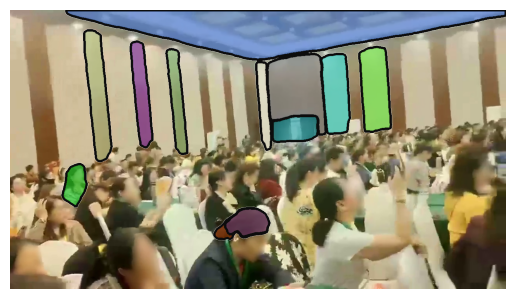

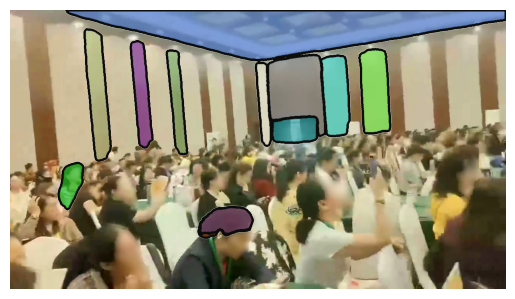

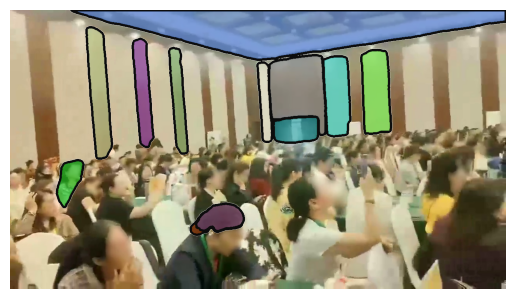

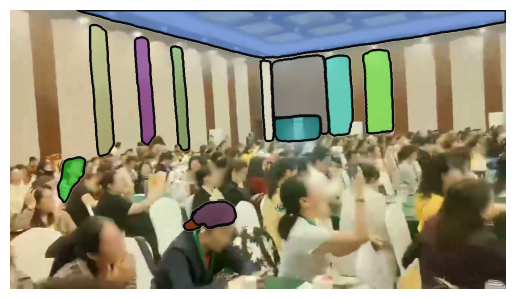

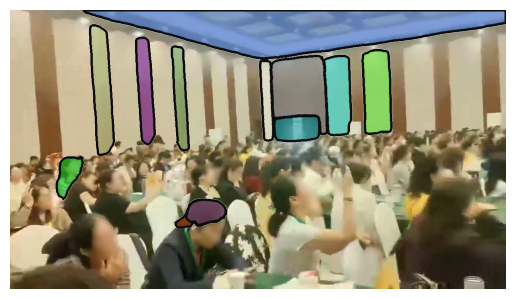

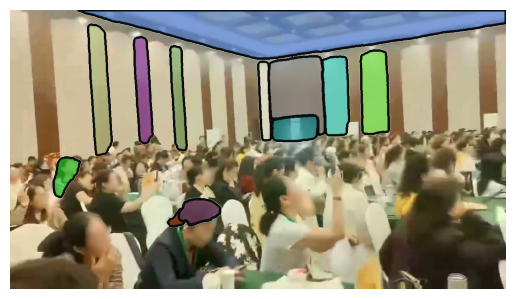

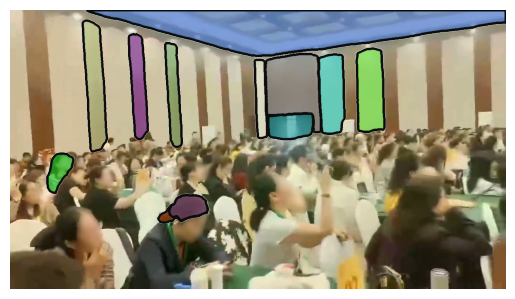

In [8]:
for i in range(10):
    sav_dataset.visualize_annotation(
        frames, manual_annot, auto_annot,
        annotated_frame_id=i,
        show_auto=False,
    )

### Show the SA-V annotations in frame 0 - auto only

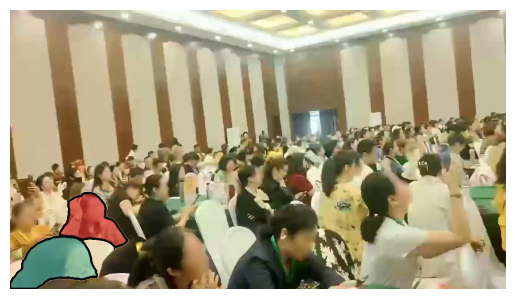

In [9]:
sav_dataset.visualize_annotation(
    frames, manual_annot, auto_annot,
    annotated_frame_id=0,
    show_manual=False,
)

### Masklet annotations and Metadata

#### Manual annotations and metadata

In [10]:
pd.DataFrame([manual_annot])

,video_id,video_duration,video_frame_count,video_height,video_width,video_resolution,video_environment,video_split,masklet,masklet_id,masklet_size_rel,masklet_size_abs,masklet_size_bucket,masklet_visibility_changes,masklet_first_appeared_frame,masklet_frame_count,masklet_edited_frame_count,masklet_type,masklet_stability_score,masklet_num
0,sav_001233,14.791667,355.0,720.0,1280.0,921600.0,Indoor,train,"[[{'size': [720, 1280], 'counts': 'PPTl0'}, {'...","[0, 1, 2]","[0.0096828551, 0.007106056, 0.0094926525]","[8923.7192982456, 6548.9411764706, 8748.428571...","[medium, medium, medium]","[0, 1, 1]","[32.0, 0.0, 0.0]","[89, 89, 89]","[8, 7, 1]","[manual, manual, manual]","[None, None, None]",3


#### Auto annotations and metadata

In [11]:
pd.DataFrame([auto_annot])

,video_id,video_duration,video_frame_count,video_height,video_width,video_resolution,video_environment,video_split,masklet,masklet_id,masklet_size_rel,masklet_size_abs,masklet_size_bucket,masklet_visibility_changes,masklet_first_appeared_frame,masklet_frame_count,masklet_edited_frame_count,masklet_type,masklet_stability_score,masklet_num
0,sav_001233,14.791667,355.0,720.0,1280.0,921600.0,Indoor,train,"[[{'size': [720, 1280], 'counts': 'bgi>:oe0:J5...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0038488471798780485, 0.002931384659900285, ...","[3547.0975609756097, 2701.5641025641025, 11194...","[medium, medium, large, large, large, large, l...","[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[auto, auto, auto, auto, auto, auto, auto, aut...","[[0.9980236887931824, 1.0, 0.9995515942573547,...",12


#### Video info

In [12]:
video_id = manual_annot["video_id"]
video_duration = manual_annot["video_duration"]
video_frame_count = manual_annot["video_frame_count"]
H = manual_annot["video_height"]
W = manual_annot["video_width"]
environment = manual_annot["video_environment"]
print(
    f"{video_id} is {video_duration} seconds long with {video_frame_count} frames. The video resolution is {H} x {W}."
)
print(f"This video is captured in {environment} environment.")

sav_001233 is 14.7916666667 seconds long with 355.0 frames. The video resolution is 720.0 x 1280.0.
This video is captured in Indoor environment.


#### Masklet info

In [13]:
print(
    f"There are {manual_annot['masklet_num']} manually labeled masklets and {auto_annot['masklet_num']} automatically generated masklets."
)
print(
    f"In SA-V, videos are annotated every 4 frames. Therefore, there are {manual_annot['masklet_frame_count'][0]} frames being annotated."
)

There are 3 manually labeled masklets and 12 automatically generated masklets.
In SA-V, videos are annotated every 4 frames. Therefore, there are 89 frames being annotated.


In [11]:
# Get the rle of the manual masklet with masklet_id=0 in frame 0
masklet_id = 0
annotated_frame_id = 0
manual_annot["masklet"][annotated_frame_id][masklet_id]
# decode the rle using `mask_util.decode(rle)>0` to get the binary segmentation mask

{'size': [848, 480],
 'counts': 'i\\Y4<Qj05K4L4M3M2N3O000010O00001O00010O00000O101O0000000000000O010000000O10O10000O01000O100O010O1O1O1N2O1O0O2O1N20O01O1001N101O1N100O100O10O01O2O00000O1O10O1O11N1O1O100O1O2N1O1O3L4HTXk5'}

In [12]:
# Get the rle of the masklet with masklet_id=5 in frame 100
masklet_id = 5
annotated_frame_id = 100
auto_annot["masklet"][annotated_frame_id][masklet_id]
# decode the rle using `mask_util.decode(rle)>0` to get the binary segmentation mask

{'size': [848, 480],
 'counts': 'Q_T6S1Xh0X1eNY1[Od0E;M4N10000O101O00000000000000O0100000000001M2O1O1N3N1M4H8B?@e0POc1jMfZ[5'}